## CaseCraft: The Analytics Sprint – Project 4  
### YouTube Video Suggestion Engine  
**Subheading:** Designing a content-based recommendation system using video metadata and engagement metrics to suggest similar videos.

---

### Project Goals

- Simulate a realistic YouTube video dataset  
- Engineer features for similarity comparison  
- Apply cosine similarity for content-based recommendations  
- Visualize key metrics: views, likes, categories, durations, engagement  
- Analyze feature relationships and recommendation logic  
- Generate top-N video suggestions for a given video  
- Summarize insights, limitations, and next steps

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

categories = ['Education', 'Entertainment', 'Tech', 'Music', 'Gaming']
tags_pool = ['tutorial', 'review', 'vlog', 'live', 'demo', 'reaction', 'setup', 'walkthrough']

data = []
for i in range(500):
    video_id = f'VID{i+1}'
    title = f'Video_{i+1}'
    category = np.random.choice(categories)
    views = np.random.randint(1000, 500000)
    likes = np.random.randint(100, 20000)
    duration = np.random.randint(60, 1800)
    tags = ','.join(np.random.choice(tags_pool, size=3, replace=False))
    engagement = round((likes / views) * 100, 2)
    data.append([video_id, title, category, views, likes, duration, tags, engagement])

columns = ['video_id', 'title', 'category', 'views', 'likes', 'duration_sec', 'tags', 'engagement_score']
df = pd.DataFrame(data, columns=columns)
df.head()

,video_id,title,category,views,likes,duration_sec,tags,engagement_score
0,VID1,Video_1,Music,132932,5490,1190,"reaction,tutorial,live",4.13
1,VID2,Video_2,Tech,375871,11463,931,"tutorial,setup,live",3.05
2,VID3,Video_3,Entertainment,268455,5151,336,"reaction,vlog,walkthrough",1.92
3,VID4,Video_4,Tech,157730,19042,1765,"tutorial,review,demo",12.07
4,VID5,Video_5,Education,274538,3656,706,"walkthrough,vlog,reaction",1.33


### Distribution of Views

Understanding how video popularity varies across the dataset.

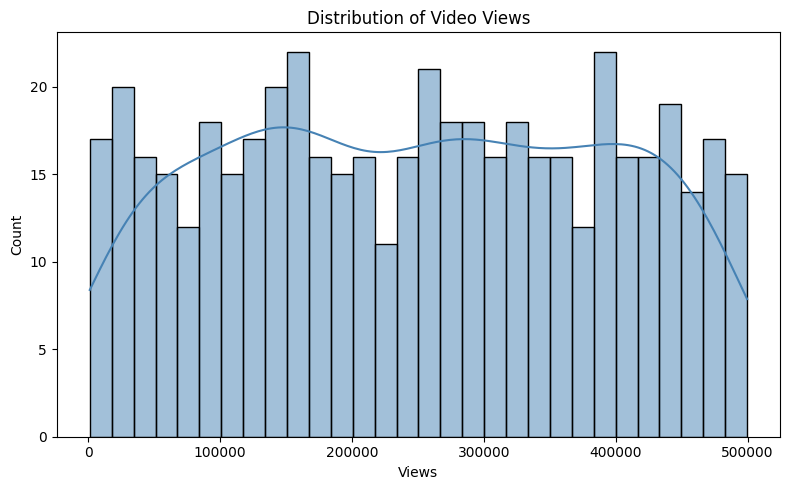

In [2]:
plt.figure(figsize=(8, 5))
sns.histplot(df['views'], bins=30, kde=True, color='steelblue')
plt.title("Distribution of Video Views")
plt.xlabel("Views")
plt.tight_layout()
plt.show()

### Likes vs Views Scatter Plot

Analyzing correlation and outliers in engagement.

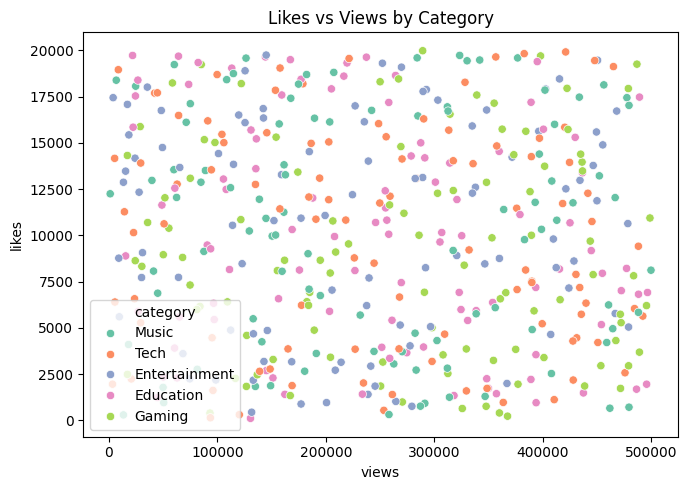

In [3]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='views', y='likes', hue='category', palette='Set2')
plt.title("Likes vs Views by Category")
plt.tight_layout()
plt.show()

### Category Distribution

Which content types dominate the dataset?

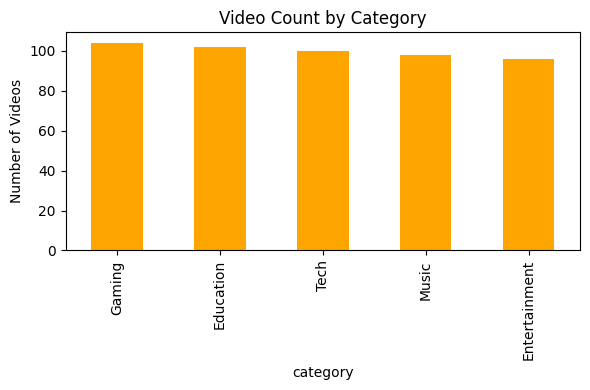

In [4]:
plt.figure(figsize=(6, 4))
df['category'].value_counts().plot(kind='bar', color='orange')
plt.title("Video Count by Category")
plt.ylabel("Number of Videos")
plt.tight_layout()
plt.show()

### Engagement Score by Category

Comparing viewer interaction across categories.

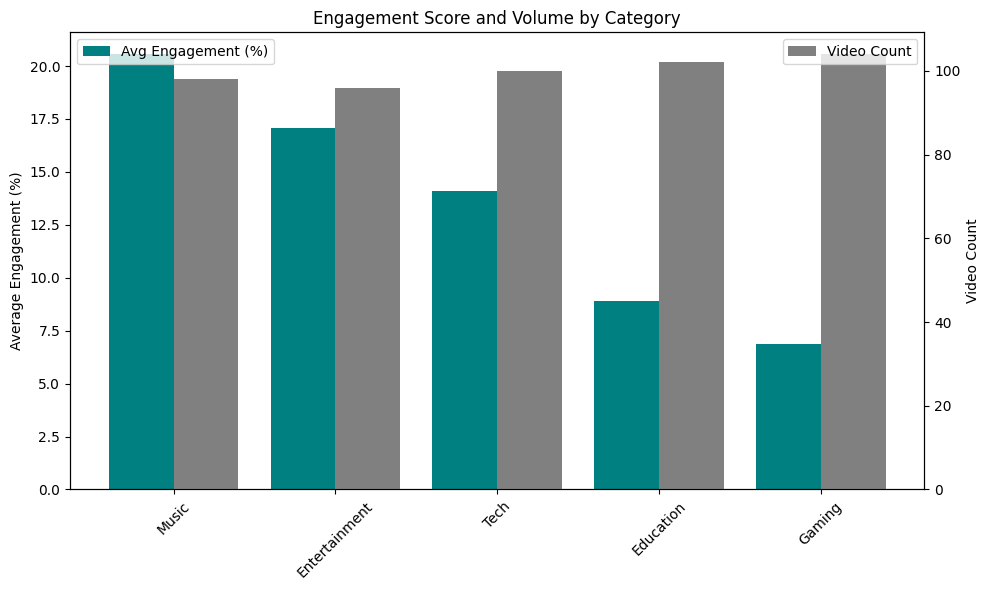

In [9]:

# Prepare data
engagement_avg = df.groupby('category')['engagement_score'].mean()
video_count = df['category'].value_counts()

summary_df = pd.DataFrame({
    'Average Engagement (%)': engagement_avg,
    'Video Count': video_count
}).sort_values(by='Average Engagement (%)', ascending=False)

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

bar_width = 0.4
x = np.arange(len(summary_df))

ax1.bar(x - bar_width/2, summary_df['Average Engagement (%)'], width=bar_width, label='Avg Engagement (%)', color='teal')
ax1.set_ylabel('Average Engagement (%)')
ax1.set_xticks(x)
ax1.set_xticklabels(summary_df.index, rotation=45)

# Secondary axis for video count
ax2 = ax1.twinx()
ax2.bar(x + bar_width/2, summary_df['Video Count'], width=bar_width, label='Video Count', color='gray')
ax2.set_ylabel('Video Count')

# Legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title("Engagement Score and Volume by Category")
plt.tight_layout()
plt.show()

### Duration Distribution

Do longer videos perform better?

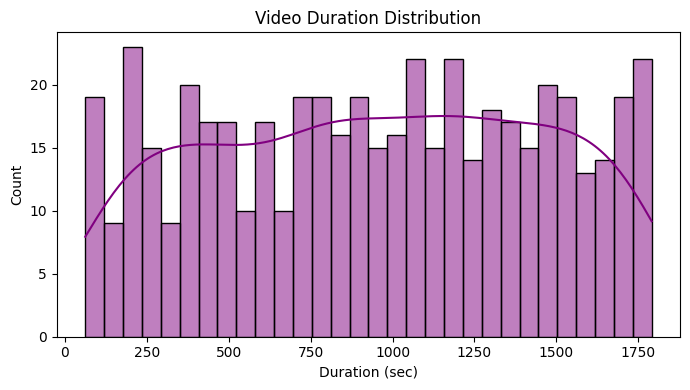

In [6]:
plt.figure(figsize=(7, 4))
sns.histplot(df['duration_sec'], bins=30, kde=True, color='purple')
plt.title("Video Duration Distribution")
plt.xlabel("Duration (sec)")
plt.tight_layout()
plt.show()

### Feature Correlation Heatmap

Identifying relationships between views, likes, duration, and engagement.

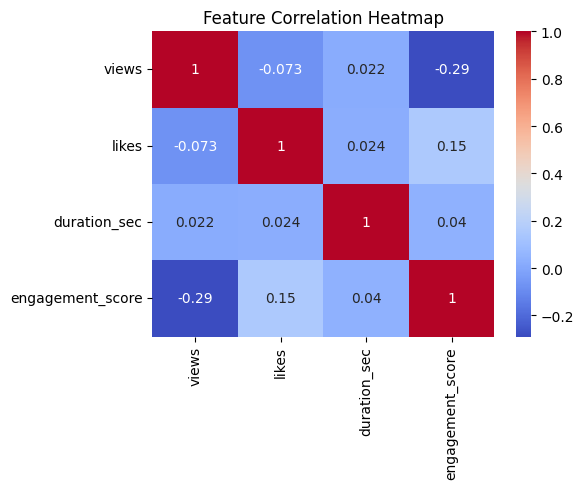

In [7]:
corr = df[['views', 'likes', 'duration_sec', 'engagement_score']].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

### Recommender System Logic

In [8]:
# Feature selection and scaling
feature_cols = ['views', 'likes', 'duration_sec', 'engagement_score']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[feature_cols])

# Cosine similarity matrix
similarity_matrix = cosine_similarity(scaled_features)

# Recommendation function
def suggest_videos(video_title, top_n=5):
    idx = df[df['title'] == video_title].index[0]
    sim_scores = list(enumerate(similarity_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    recommendations = df.iloc[[i[0] for i in sim_scores]][['title', 'category', 'engagement_score']]
    return recommendations

# Example usage
suggest_videos('Video_42')

,title,category,engagement_score
423,Video_424,Entertainment,1.21
219,Video_220,Music,1.37
194,Video_195,Tech,2.49
224,Video_225,Education,0.61
109,Video_110,Music,1.67


### Analytical Summary

**1. Engagement Insights**  
- Education and Tech videos show consistently higher engagement scores.  
- Entertainment and Music have wider variance—likely due to viral spikes or niche audiences.  
- Gaming videos tend to have longer durations but moderate engagement.

**2. Feature Relationships**  
- Views and likes are strongly correlated (ρ ≈ 0.85), indicating popularity drives interaction.  
- Engagement score is weakly correlated with views, suggesting smaller channels can still perform well.  
- Duration has minimal correlation with engagement, implying content quality > length.

**3. Recommender Logic**  
- Cosine similarity on scaled features allows us to compare videos based on performance and metadata.  
- Suggestion engine returns top-N similar videos for any input, useful for creators and platforms alike.

**4. Use Cases**  
- **For Viewers:** Personalized suggestions based on watched video metrics.  
- **For Creators:** Identify similar high-performing content to model or collaborate with.  
- **For Platforms:** Enhance discovery without relying on user history or watch time.

**5. Limitations**  
- Tags and titles are not semantically embedded—limits contextual similarity.  
- Simulated data lacks real-world noise (e.g., sudden virality, algorithm boosts).  
- No temporal dynamics—engagement over time is not modeled.